In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
data = pd.read_csv("bitcoin_dataset.csv")

In [3]:
data.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [4]:
data.shape

(2906, 24)

In [5]:
data.isnull().any()

Date                                                   False
btc_market_price                                       False
btc_total_bitcoins                                      True
btc_market_cap                                         False
btc_trade_volume                                        True
btc_blocks_size                                         True
btc_avg_block_size                                     False
btc_n_orphaned_blocks                                  False
btc_n_transactions_per_block                           False
btc_median_confirmation_time                            True
btc_hash_rate                                          False
btc_difficulty                                          True
btc_miners_revenue                                     False
btc_transaction_fees                                    True
btc_cost_per_transaction_percent                       False
btc_cost_per_transaction                               False
btc_n_unique_addresses  

In [6]:
data = data.fillna(method='ffill')

In [7]:
data.isnull().any()

Date                                                   False
btc_market_price                                       False
btc_total_bitcoins                                     False
btc_market_cap                                         False
btc_trade_volume                                       False
btc_blocks_size                                        False
btc_avg_block_size                                     False
btc_n_orphaned_blocks                                  False
btc_n_transactions_per_block                           False
btc_median_confirmation_time                           False
btc_hash_rate                                          False
btc_difficulty                                         False
btc_miners_revenue                                     False
btc_transaction_fees                                   False
btc_cost_per_transaction_percent                       False
btc_cost_per_transaction                               False
btc_n_unique_addresses  

In [8]:
X = data[['btc_market_cap', 'btc_n_transactions', 'btc_miners_revenue', 'btc_cost_per_transaction', 'btc_difficulty', 'btc_hash_rate', 'btc_cost_per_transaction_percent']].values
y = data['btc_market_price'].values

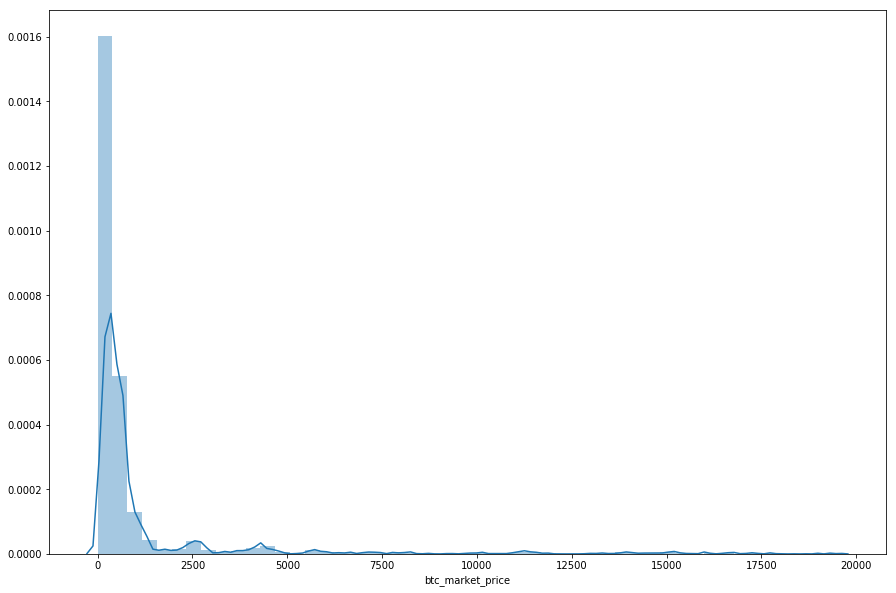

In [9]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(data['btc_market_price'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [11]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)
df1

,Actual,Predicted
0,5.830010,15.377512
1,265.850000,272.421417
2,101.899980,109.215814
3,453.390000,464.228513
4,3.230000,4.079555
5,14.100000,48.203623
6,3.255000,2.045330
7,2501.191343,2486.721905
8,778.493500,796.834179
9,11.127000,11.740667


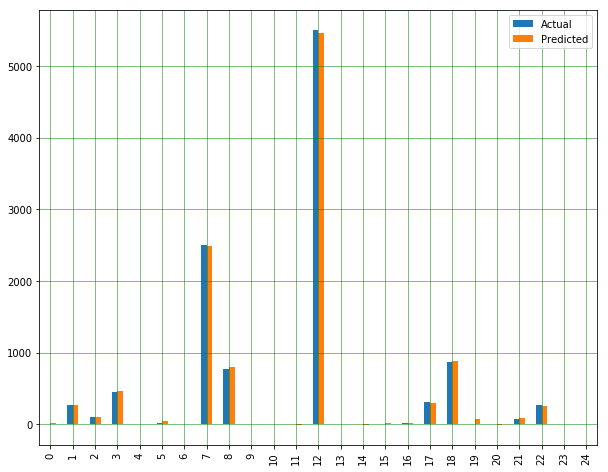

In [14]:
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [15]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 13.31404116988292
Mean Squared Error: 445.41968108040106
Root Mean Squared Error: 21.104968161084752
